In [1]:
import pandas as pd

file_path = "C:/Users/espin/OneDrive/Desktop/Resume/U.S._Chronic_Disease_Indicators__CDI___2023_Release_20250102.csv"
data = pd.read_csv(file_path, low_memory=False)

data['DataValue'] = pd.to_numeric(data['DataValue'], errors='coerce')

#Drop rows where 'DataValue' is NaN
data = data.dropna(subset=['DataValue'])

#Dups
data = data.drop_duplicates()

print(data.head())


   YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question  Response DataValueUnit DataValueType  ...  \
0  Hospitalizations for asthma       NaN           NaN        Number  ...   
1  Hospitalizations for asthma       NaN           NaN        Number  ...   
2  Hospitalizations for asthma       NaN           NaN        Number  ...   
3  Hospitalizations for asthma       NaN           NaN        Number  ...   
4  Hospitalizations for asthma       NaN           NaN        Number  ...   

   LocationID  TopicID QuestionID DataValueTypeID  Stratificat

C:\Users\espin\AppData\Local\Temp\ipykernel_63288\847870436.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DataValue', y='Topic', data=all_diseases_sorted, palette='viridis')


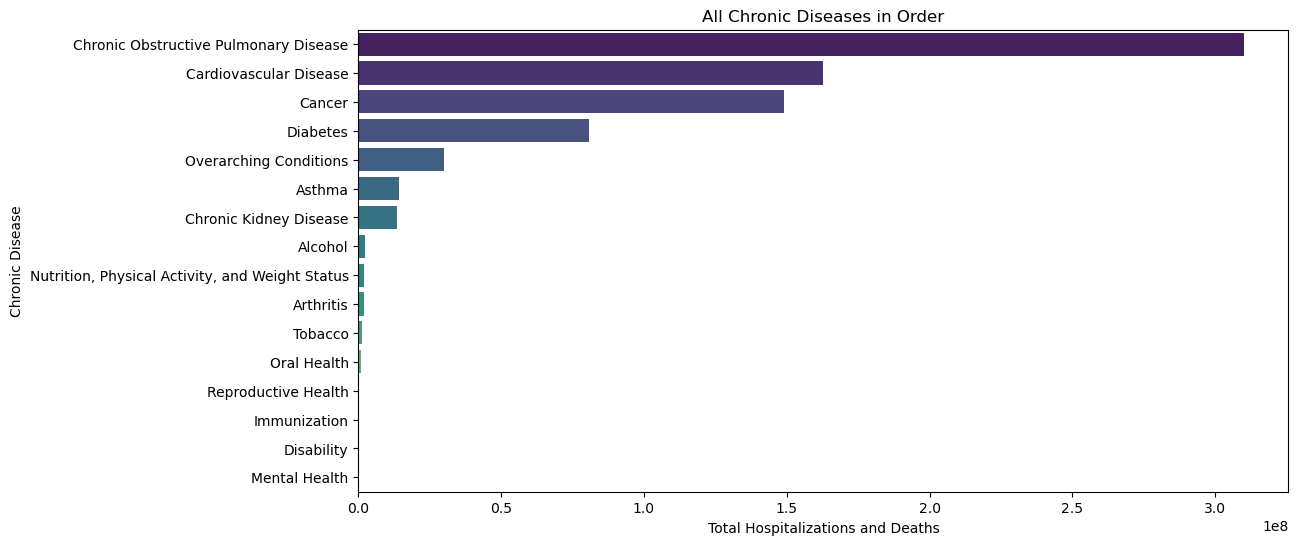

                                              Topic     DataValue
6             Chronic Obstructive Pulmonary Disease  3.101398e+08
4                            Cardiovascular Disease  1.626336e+08
3                                            Cancer  1.489155e+08
7                                          Diabetes  8.084562e+07
14                           Overarching Conditions  2.984485e+07
2                                            Asthma  1.422127e+07
5                            Chronic Kidney Disease  1.368039e+07
0                                           Alcohol  2.227764e+06
11  Nutrition, Physical Activity, and Weight Status  2.132288e+06
1                                         Arthritis  1.965810e+06
16                                          Tobacco  1.128186e+06
13                                      Oral Health  8.482844e+05
15                              Reproductive Health  3.502813e+05
9                                      Immunization  3.440268e+05
8         

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#Group data for all chronic diseases
all_diseases = data.groupby('Topic').agg({'DataValue': 'sum'}).reset_index()

all_diseases = all_diseases[all_diseases['Topic'] != 'Older Adults']

all_diseases_sorted = all_diseases.sort_values(by='DataValue', ascending=False)



#Graph of chronic diseases in order
plt.figure(figsize=(12, 6))
sns.barplot(x='DataValue', y='Topic', data=all_diseases_sorted, palette='viridis')
plt.title('All Chronic Diseases in Order')
plt.xlabel('Total Hospitalizations and Deaths')
plt.ylabel('Chronic Disease')
plt.show()

print(all_diseases_sorted)


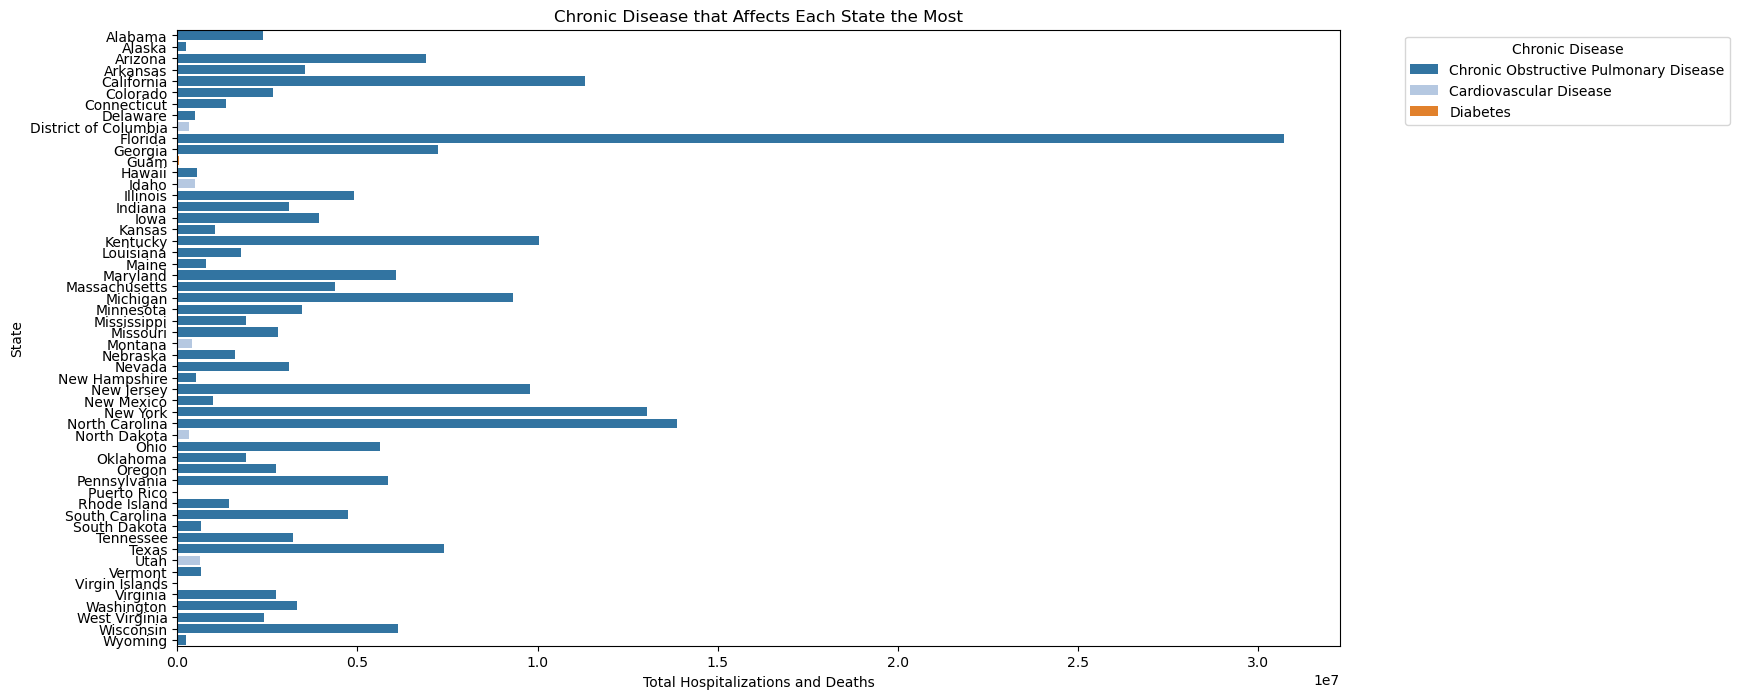

             LocationDesc                                  Topic    DataValue
6                 Alabama  Chronic Obstructive Pulmonary Disease   2366196.13
23                 Alaska  Chronic Obstructive Pulmonary Disease    236256.95
40                Arizona  Chronic Obstructive Pulmonary Disease   6893042.27
57               Arkansas  Chronic Obstructive Pulmonary Disease   3542279.75
74             California  Chronic Obstructive Pulmonary Disease  11318695.66
91               Colorado  Chronic Obstructive Pulmonary Disease   2652695.25
108           Connecticut  Chronic Obstructive Pulmonary Disease   1339426.04
125              Delaware  Chronic Obstructive Pulmonary Disease    482094.13
140  District of Columbia                 Cardiovascular Disease    333078.30
159               Florida  Chronic Obstructive Pulmonary Disease  30732601.61
176               Georgia  Chronic Obstructive Pulmonary Disease   7229517.73
194                  Guam                               Diabetes

In [3]:
#Chronic disease that affects each state the most
state_most_affected_disease = data.groupby(['LocationDesc', 'Topic']).agg({'DataValue': 'sum'}).reset_index()
state_most_affected_disease = state_most_affected_disease.loc[state_most_affected_disease.groupby('LocationDesc')['DataValue'].idxmax()]

#filter
plot_data = state_most_affected_disease[state_most_affected_disease['LocationDesc'] != 'United States']

#Graph of chronic disease that affects each state the most
plt.figure(figsize=(15, 8))
sns.barplot(y='LocationDesc', x='DataValue', hue='Topic', data=plot_data, palette='tab20')
plt.title('Chronic Disease that Affects Each State the Most')
plt.xlabel('Total Hospitalizations and Deaths')
plt.ylabel('State')
plt.legend(title='Chronic Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(plot_data)


C:\Users\espin\AppData\Local\Temp\ipykernel_63288\1986732454.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DataValue', y='LocationDesc', data=state_rankings, palette='coolwarm')


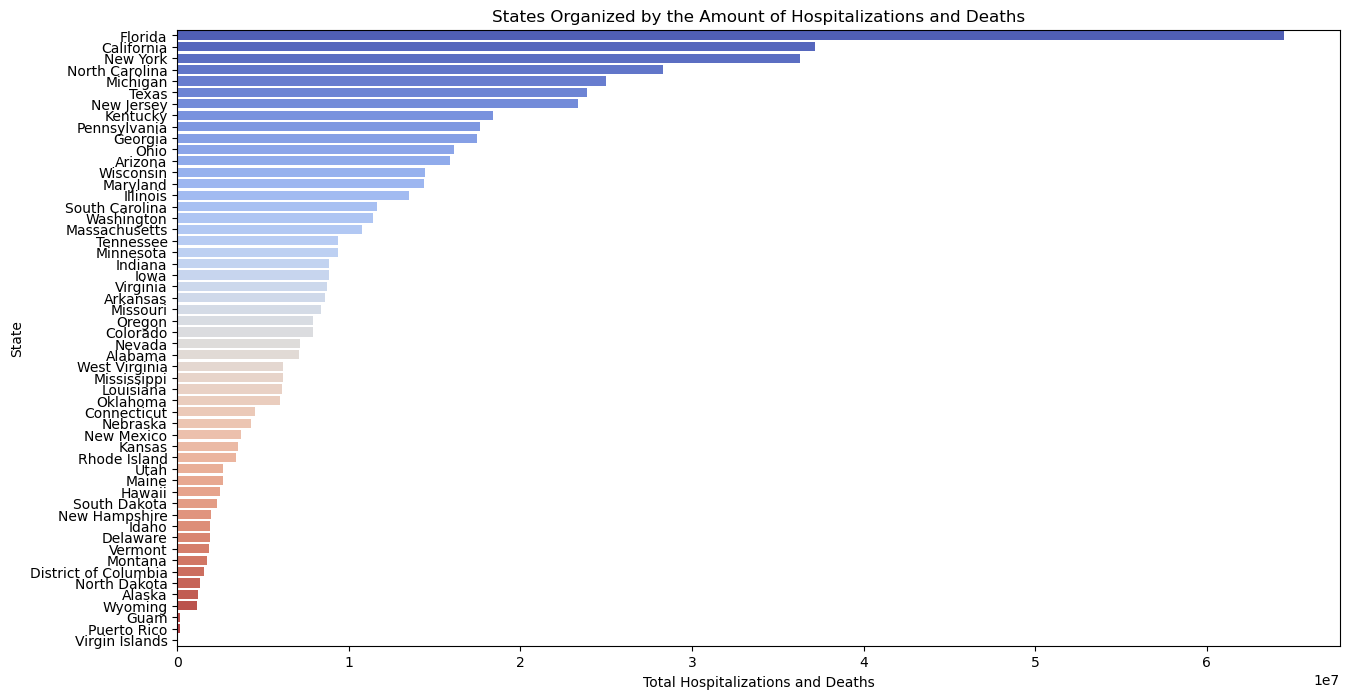

            LocationDesc    DataValue
9                Florida  64515166.42
4             California  37171867.86
33              New York  36271940.94
34        North Carolina  28291004.02
23              Michigan  24995267.27
45                 Texas  23851319.87
31            New Jersey  23377182.57
18              Kentucky  18391927.80
39          Pennsylvania  17620780.49
10               Georgia  17452725.04
36                  Ohio  16098058.79
2                Arizona  15914997.17
53             Wisconsin  14443505.85
21              Maryland  14397894.36
14              Illinois  13477686.93
42        South Carolina  11662932.01
51            Washington  11422913.91
22         Massachusetts  10788812.41
44             Tennessee   9352569.57
24             Minnesota   9340297.22
15               Indiana   8866694.57
16                  Iowa   8850299.79
50              Virginia   8740743.97
3               Arkansas   8591980.97
26              Missouri   8370876.81
38          

In [4]:
#Rank the states based on total hospitalizations and deaths for all chronic diseases
state_rankings = data.groupby('LocationDesc').agg({'DataValue': 'sum'}).reset_index()

#filter
state_rankings = state_rankings[state_rankings['LocationDesc'] != 'United States']

#Rank the states in descending order
state_rankings = state_rankings.sort_values(by='DataValue', ascending=False)

#Graph of states organized by the amount of hospitalizations and deaths
plt.figure(figsize=(15, 8))
sns.barplot(x='DataValue', y='LocationDesc', data=state_rankings, palette='coolwarm')
plt.title('States Organized by the Amount of Hospitalizations and Deaths')
plt.xlabel('Total Hospitalizations and Deaths')
plt.ylabel('State')
plt.show()

# Display the ranked list of states
print(state_rankings)


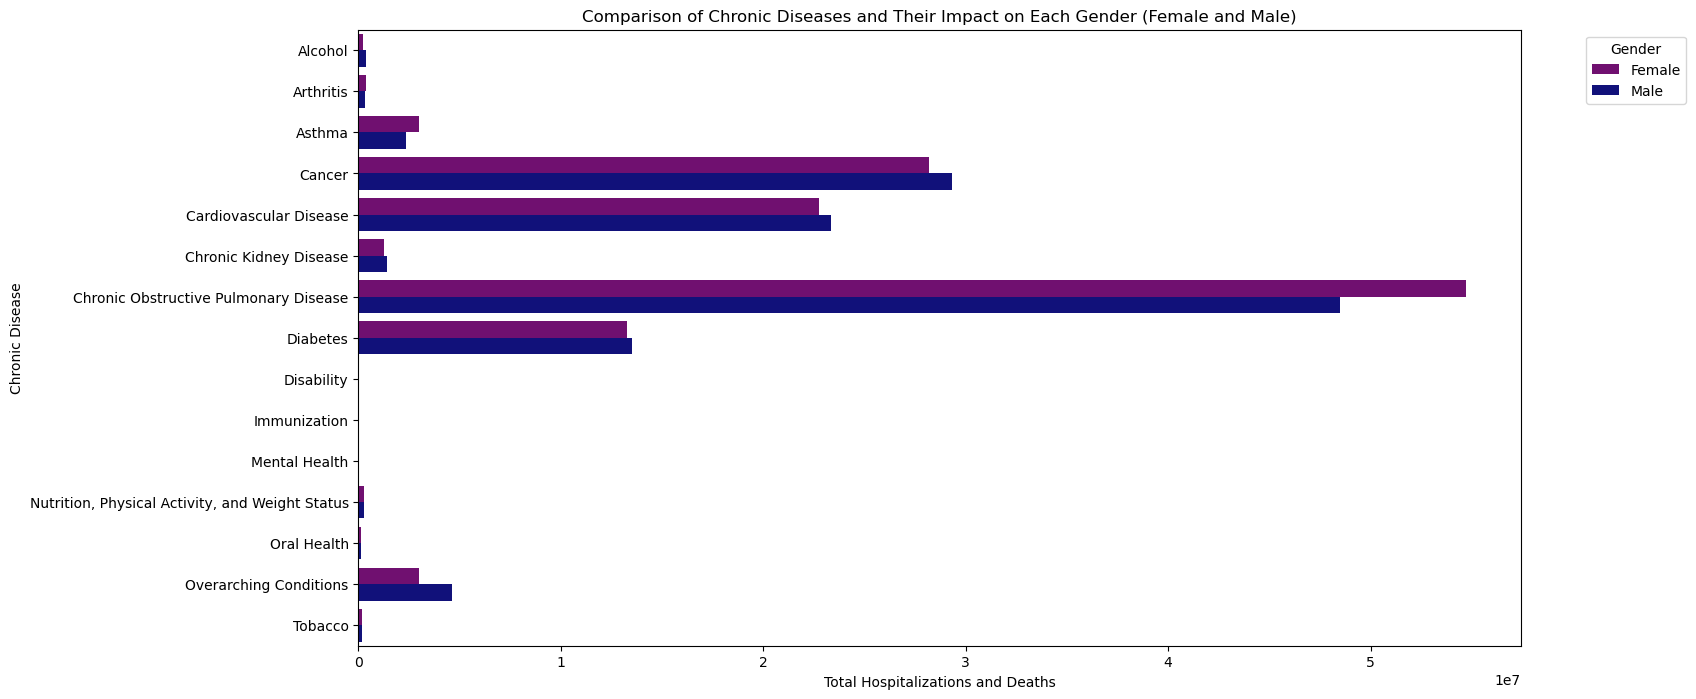

   Stratification1                                            Topic  \
0           Female                                          Alcohol   
1           Female                                        Arthritis   
2           Female                                           Asthma   
3           Female                                           Cancer   
4           Female                           Cardiovascular Disease   
5           Female                           Chronic Kidney Disease   
6           Female            Chronic Obstructive Pulmonary Disease   
7           Female                                         Diabetes   
8           Female                                       Disability   
9           Female                                     Immunization   
10          Female                                    Mental Health   
11          Female  Nutrition, Physical Activity, and Weight Status   
12          Female                                      Oral Health   
13    

In [5]:
#Sex "Female" and "Male"
gender_disease_data = data[(data['Stratification1'] == 'Female') | (data['Stratification1'] == 'Male')]

#Filter
gender_disease_data = gender_disease_data[gender_disease_data['Topic'] != 'Older Adults']

#Group
gender_disease_summary = gender_disease_data.groupby(['Stratification1', 'Topic']).agg({'DataValue': 'sum'}).reset_index()

#Comparison between all chronic diseases
plt.figure(figsize=(15, 8))
sns.barplot(x='DataValue', y='Topic', hue='Stratification1', data=gender_disease_summary, palette={'Male': 'darkblue', 'Female': 'purple'})
plt.title('Comparison of Chronic Diseases and Their Impact on Each Gender (Female and Male)')
plt.xlabel('Total Hospitalizations and Deaths')
plt.ylabel('Chronic Disease')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


print(gender_disease_summary)


In [6]:
#Diabetes and asthma 
condition_data = data[data['Topic'].str.contains('Diabetes|Asthma', case=False)]

#Clean data
condition_data = condition_data.dropna(subset=['DataValue'])
condition_data['LowConfidenceLimit'].fillna(condition_data['LowConfidenceLimit'].mean(), inplace=True)
condition_data['HighConfidenceLimit'].fillna(condition_data['HighConfidenceLimit'].mean(), inplace=True)

#Dups
condition_data = condition_data.drop_duplicates()

#Group by state and year
state_year_data = condition_data.groupby(['LocationDesc', 'YearStart', 'Topic']).agg({
    'DataValue': 'sum'
}).reset_index()

print(state_year_data.head())


  LocationDesc  YearStart     Topic  DataValue
0      Alabama       2010    Asthma      283.1
1      Alabama       2010  Diabetes    12746.2
2      Alabama       2011    Asthma     1979.5
3      Alabama       2011  Diabetes    19177.2
4      Alabama       2012    Asthma     2456.0


C:\Users\espin\AppData\Local\Temp\ipykernel_63288\2529528281.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  condition_data['LowConfidenceLimit'].fillna(condition_data['LowConfidenceLimit'].mean(), inplace=True)
C:\Users\espin\AppData\Local\Temp\ipykernel_63288\2529528281.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

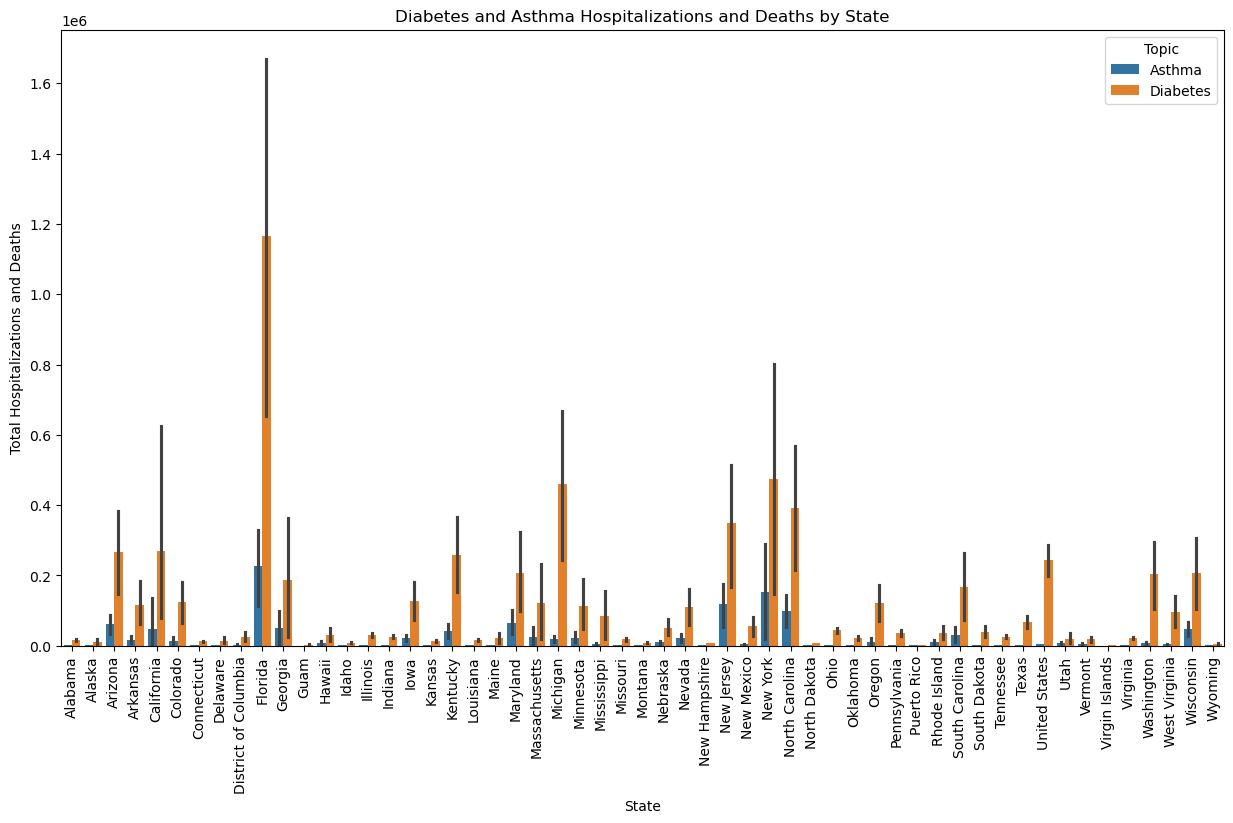

In [7]:
# Visualizing Diabetes and Asthma Hospitalizations and Deaths by State
plt.figure(figsize=(15, 8))
sns.barplot(x='LocationDesc', y='DataValue', hue='Topic', data=state_year_data)
plt.title('Diabetes and Asthma Hospitalizations and Deaths by State')
plt.xlabel('State')
plt.ylabel('Total Hospitalizations and Deaths')
plt.xticks(rotation=90)
plt.show()


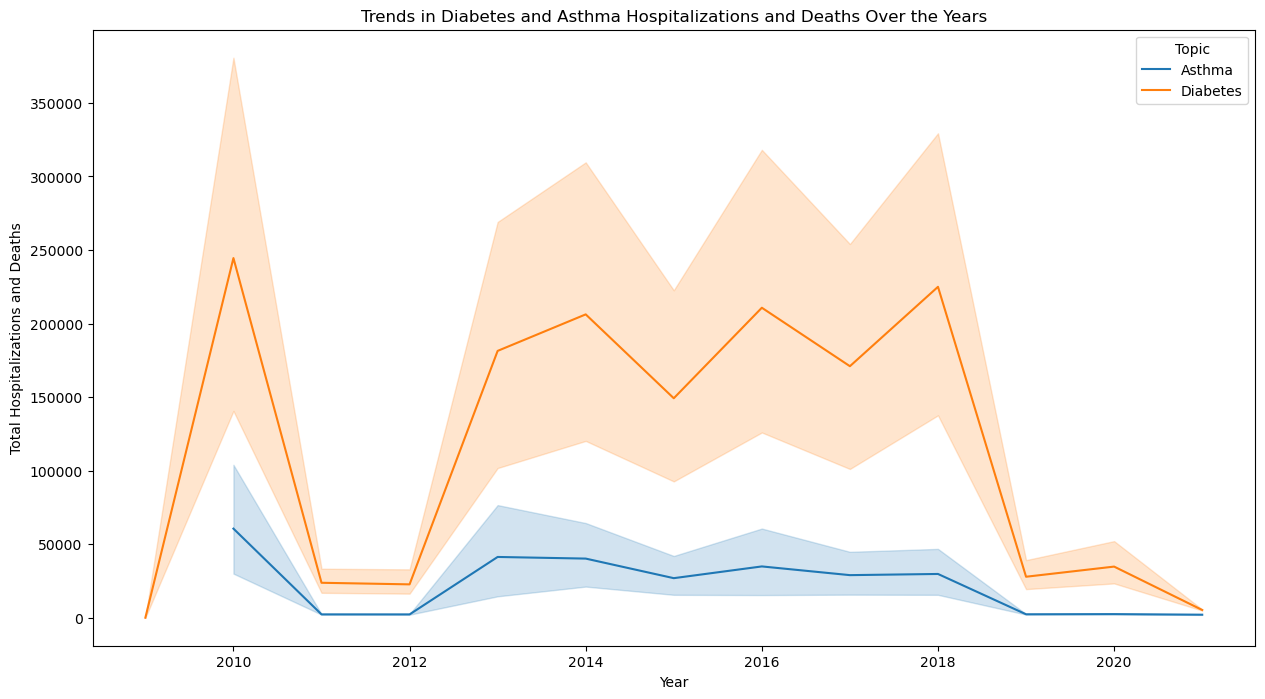

In [8]:
#Graph over the years
plt.figure(figsize=(15, 8))
sns.lineplot(x='YearStart', y='DataValue', hue='Topic', data=state_year_data)
plt.title('Trends in Diabetes and Asthma Hospitalizations and Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Hospitalizations and Deaths')
plt.show()
